In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scratchNNlib import NN
from scratchNNlib.Layers import LinearLayer, MomentumLinearLayer, Dropout
from scratchNNlib.Layers.ActivationLayers import ReLU, Softmax
from scratchNNlib.Loss import BinaryCrossEntropy

In [2]:
test_data = pd.read_csv('Training_Data/mnist_test.csv')
train_data = pd.read_csv('Training_Data/mnist_train.csv')

In [3]:
## 1D Data formats, superseded in next coded block by 2D formats

x_train = train_data.iloc[:,1:].to_numpy()
y_train = train_data['label'].to_numpy()

x_test = test_data.iloc[:,1:].to_numpy()
y_test = test_data['label'].to_numpy()

## Normalizing Data
x_train = x_train/255
x_test = x_test/255

In [4]:
x_train = x_train.reshape(60000, 784, 1)[:128]
x_test = x_test.reshape(10000, 784, 1)

y_train = y_train.reshape(60000, 1, 1)[:128]
y_test = y_test.reshape(10000, 1, 1)


In [5]:
def one_hot_encode(num: int, size: int = 10):
    out = np.zeros((1, size))
    out[0][num] =+ 1
    return out

In [6]:
class MNISTNeural(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            LinearLayer(784, 256),
            ReLU(),
            Dropout(0.1),
            LinearLayer(256, 128),
            ReLU(),
            Dropout(0.1),
            LinearLayer(128, 10),
            Softmax(),
        ]

class MNISTNeuralMomentum(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            MomentumLinearLayer(784, 256),
            ReLU(),
            Dropout(0.1),
            MomentumLinearLayer(256, 128),
            ReLU(),
            Dropout(0.1),
            MomentumLinearLayer(128, 10),
            Softmax(),
        ]

class MNISTNeuralMomentumNoDroput(NN):
    def __init__(self):
        super().__init__()
        self.chain = [
            MomentumLinearLayer(784, 256),
            ReLU(),
            MomentumLinearLayer(256, 128),
            ReLU(),
            MomentumLinearLayer(128, 10),
            Softmax(),
        ]

In [8]:
if __name__ == "__main__":
    epochs = 40
    lr = 0.02
    
    loss_function = BinaryCrossEntropy()
    model = MNISTNeuralMomentum()

    
    samples = len(x_train)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        # if i % 32 == 0:
        #     lr /= 2
        for sample in range(samples):
            output = model(x_train[sample])
            #print(f'NN output: {output}, expected value: {y_train[sample]}')
            #print(f'sample: {one_hot_encode(y_train[sample])}')

            error += loss_function(output, one_hot_encode(y_train[sample]).T)
            
            #print(f'Loss: {error}')
        
            loss = loss_function.backward()
            #print(f'Gradiant: {loss}')
            model.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        print('epoch %d/%d   error=%f' % (i+1, epochs, error))
        

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

epoch 1/40   error=0.253271
epoch 2/40   error=0.189560
epoch 3/40   error=0.140271
epoch 4/40   error=0.102720
epoch 5/40   error=0.088797
epoch 6/40   error=0.065985
epoch 7/40   error=0.069599
epoch 8/40   error=0.077284
epoch 9/40   error=0.057449
epoch 10/40   error=0.036422
epoch 11/40   error=0.036413
epoch 12/40   error=0.031936
epoch 13/40   error=0.033183
epoch 14/40   error=0.035540
epoch 15/40   error=0.023064
epoch 16/40   error=0.020264
epoch 17/40   error=0.018844
epoch 18/40   error=0.030075
epoch 19/40   error=0.025323
epoch 20/40   error=0.014000
epoch 21/40   error=0.015663
epoch 22/40   error=0.009568
epoch 23/40   error=0.007996
epoch 24/40   error=0.011394
epoch 25/40   error=0.007348
epoch 26/40   error=0.006050


KeyboardInterrupt: 

epoch 1/1000   error=0.429080
epoch 2/1000   error=0.423123
epoch 3/1000   error=0.417519
epoch 4/1000   error=0.412251
epoch 5/1000   error=0.407291
epoch 6/1000   error=0.402622
epoch 7/1000   error=0.398227
epoch 8/1000   error=0.394084
epoch 9/1000   error=0.390176
epoch 10/1000   error=0.386493
epoch 11/1000   error=0.383041
epoch 12/1000   error=0.379778
epoch 13/1000   error=0.376684
epoch 14/1000   error=0.373753
epoch 15/1000   error=0.370975
epoch 16/1000   error=0.368339
epoch 17/1000   error=0.365836
epoch 18/1000   error=0.363456
epoch 19/1000   error=0.361200
epoch 20/1000   error=0.359061
epoch 21/1000   error=0.357029
epoch 22/1000   error=0.355096
epoch 23/1000   error=0.353254
epoch 24/1000   error=0.351501
epoch 25/1000   error=0.349832
epoch 26/1000   error=0.348239
epoch 27/1000   error=0.346719
epoch 28/1000   error=0.345271
epoch 29/1000   error=0.343888
epoch 30/1000   error=0.342564
epoch 31/1000   error=0.341298
epoch 32/1000   error=0.340084
epoch 33/1000   e

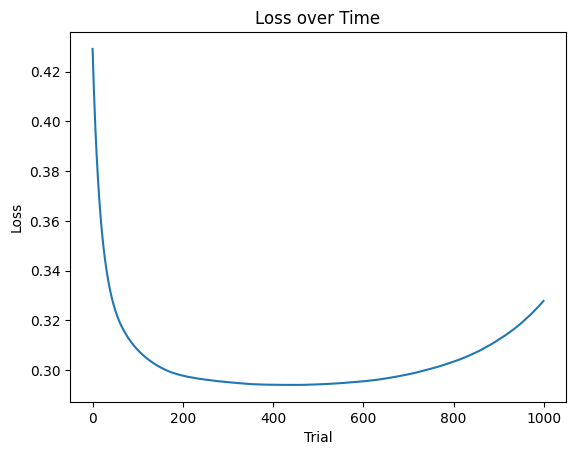

In [ ]:
if __name__ == "__main__":
    epochs = 1000
    lr = 0.001
    batch_size = 8
    
    loss_function = BinaryCrossEntropy()
    model = MNISTNeural()

    
    batchs_x = x_train.reshape(batch_size, x_train.shape[0]//batch_size, 784, 1)
    batchs_y = y_train.reshape(batch_size, y_train.shape[0]//batch_size, 1)
    
    toPlot = [[i for i in range(epochs)], []]

    for i in range(epochs):
        error = 0
        for current_batch in range(x_train.shape[0]//batch_size):
            loss = 0
            for sample in range(batch_size):
                output = model(batchs_x[current_batch][sample])

                error += loss_function(output, one_hot_encode(batchs_y[current_batch][sample]).T)
            
                loss += loss_function.backward()
                #print(f'Gradiant: {loss}')
            loss = loss/batch_size
            model.backProp(loss, lr)
        error /= samples
        toPlot[1].append(error)
        print('epoch %d/%d   error=%f' % (i+1, epochs, error))
        

plt.plot(*toPlot)
plt.title('Loss over Time')
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.show()

In [ ]:
scores = []
for x in x_test:
    scores.append(model(x))
predicted_class = np.argmax(scores, axis=1)
y = y_test.reshape(10000, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.72


In [ ]:
scores = []
for x in x_test:
    scores.append(model(x, training=False))
predicted_class = np.argmax(scores, axis=1)
y = y_test.reshape(10000, 1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.66
